In [2]:
from __future__ import division, print_function, unicode_literals
from IPython.display import Image
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes = True)
from scipy import stats
%matplotlib inline

In [5]:
Dealer = pd.read_csv('dealer_data.csv')

In [6]:
print(Dealer.shape)
Dealer.head()

(109873, 33)


,isca,caid,Vin,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,...,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,price_gap,car_count
0,1,CA11197380,5NPE34AF5GH274704,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,NaN,3
1,1,CA11197386,ZACCJBCT4FPB27624,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,...,99.0,26.0,105.0,43.0,13.0,57.0,0.0,17.0,NaN,242
2,1,CA11197387,WP1AG2A52HLB50755,45102.591991,57539.038340,56054.082781,26070.062914,0.647884,21.076159,42.979933,...,91.0,137.0,5.0,108.0,43.0,136.0,3.0,7.0,-746.921027,331
3,1,CA11197388,YV1SW592X61534208,3498.550725,6719.339623,4206.478873,128543.450704,0.595144,13.915493,101.171429,...,12.0,17.0,0.0,4.0,17.0,49.0,1.0,0.0,-6719.339623,71
4,1,CA11197391,4T1B11HK4JU069300,8850.000000,19400.000000,9144.500000,88761.500000,0.594674,13.500000,199.000000,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,2


In [7]:
len(Dealer.caid.unique())

109873

In [9]:
Dealer.describe()

,isca,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,NGC_floored_amount,list_price,...,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,price_gap,car_count
count,109873.000000,107568.000000,105844.000000,108706.000000,108706.000000,108706.000000,108706.000000,108583.000000,8891.000000,5.507800e+04,...,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,54149.000000,109873.000000
mean,0.567792,15914.615168,19970.428547,16903.288893,72191.879259,0.560649,19.799829,266.869034,12133.691491,2.507515e+04,...,24.337808,41.482384,38.865454,54.334823,25.633695,60.084798,0.470461,19.500551,2055.872450,207.238958
std,0.495385,12939.241764,14395.089078,13651.697789,48796.558435,0.086019,11.368521,277.056405,11635.205352,2.326903e+04,...,107.739147,450.969314,259.068485,389.591422,162.801403,335.396319,6.298884,364.161385,4605.409602,1210.741813
min,0.000000,100.000000,275.000000,267.000000,27.000000,0.000000,1.000000,1.000000,380.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-139233.333333,1.000000
25%,0.000000,5825.000000,9588.802083,6706.000000,29308.187657,0.512500,14.666667,77.142857,5124.005348,1.453219e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,467.952381,4.000000
50%,1.000000,14877.736470,18813.825134,15668.901408,60452.859307,0.570562,17.800000,189.555556,9289.583333,2.297500e+04,...,2.000000,3.000000,0.000000,2.000000,2.000000,7.000000,0.000000,0.000000,1733.149194,22.000000
75%,1.000000,22482.404757,26699.050374,23406.312500,116750.812500,0.616074,20.615385,362.607692,15813.418323,3.113835e+04,...,14.000000,24.000000,19.000000,31.000000,14.000000,40.000000,0.000000,2.000000,3436.711864,145.000000
max,1.000000,263000.000000,380200.000000,273038.000000,995626.000000,1.000000,283.000000,5798.000000,232207.500000,3.199900e+06,...,10350.000000,129098.000000,66688.000000,95458.000000,16396.000000,50064.000000,1527.000000,102295.000000,138991.000000,233714.000000


In [15]:
sum(Dealer.isca)

62385

In [16]:
Dealer.caid.unique()

array(['CA11197380', 'CA11197386', 'CA11197387', ...,
       'wholesaleSAPT7000455', 'wholesaleSAPT7000456',
       'wholesaleSWFL7611426'], dtype=object)

In [11]:
Dealer.isna().sum()

isca                              0
caid                              0
Vin                               0
MMR_adj_current                2305
RMI_adj_current                4029
AvgPrice                       1167
avgmiles                       1167
Salesefficiency                1167
AvgDaysToSell                  1167
inventory                      1290
NGC_floored_amount           100982
list_price                    54795
wholesale_price               51634
MMR_price                      3942
revenue                           0
cost                              0
profitability                  3942
Velocity_Cold                     0
Velocity_Hot                      0
Velocity_Warm                     0
vol_tier_Tier1                    0
vol_tier_Tier2                    0
vol_tier_Tier3                    0
vol_tier_Tier4                    0
vol_tier_Tier5                    0
availability_Excessive            0
availability_High                 0
availability_Low            

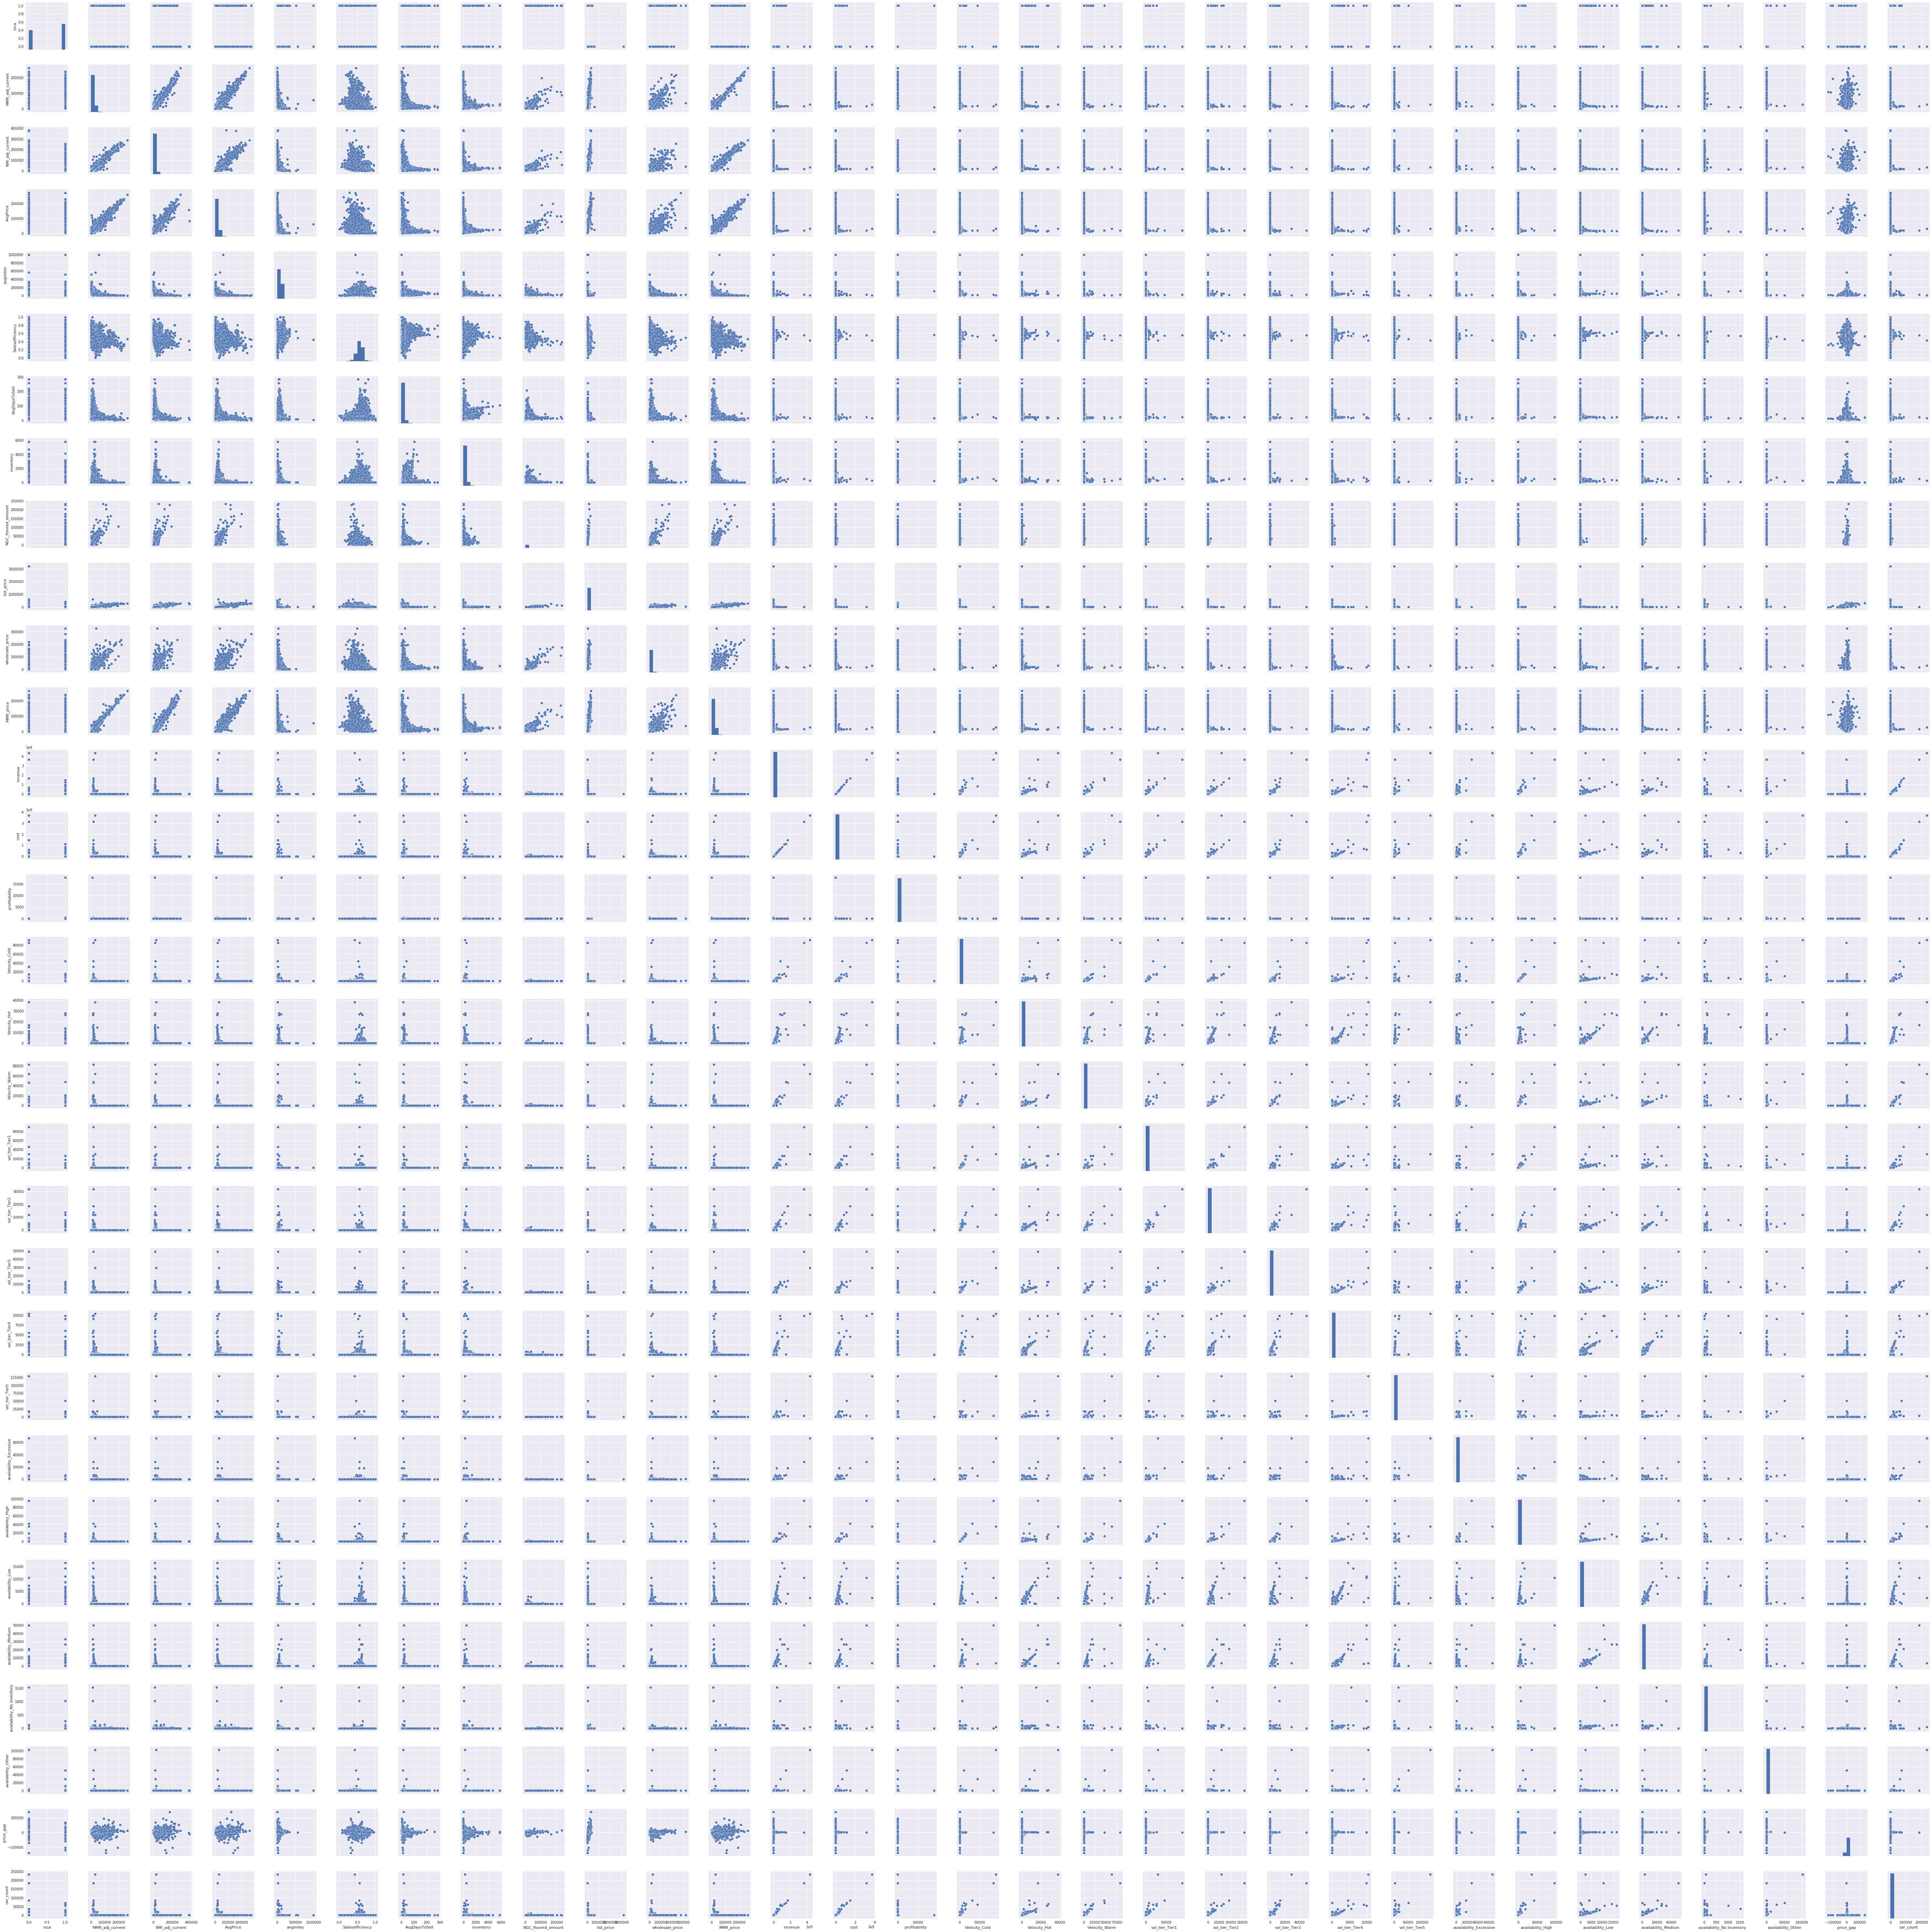

In [15]:
sns.pairplot(Dealer, size=2.5)
plt.tight_layout()
plt.show()

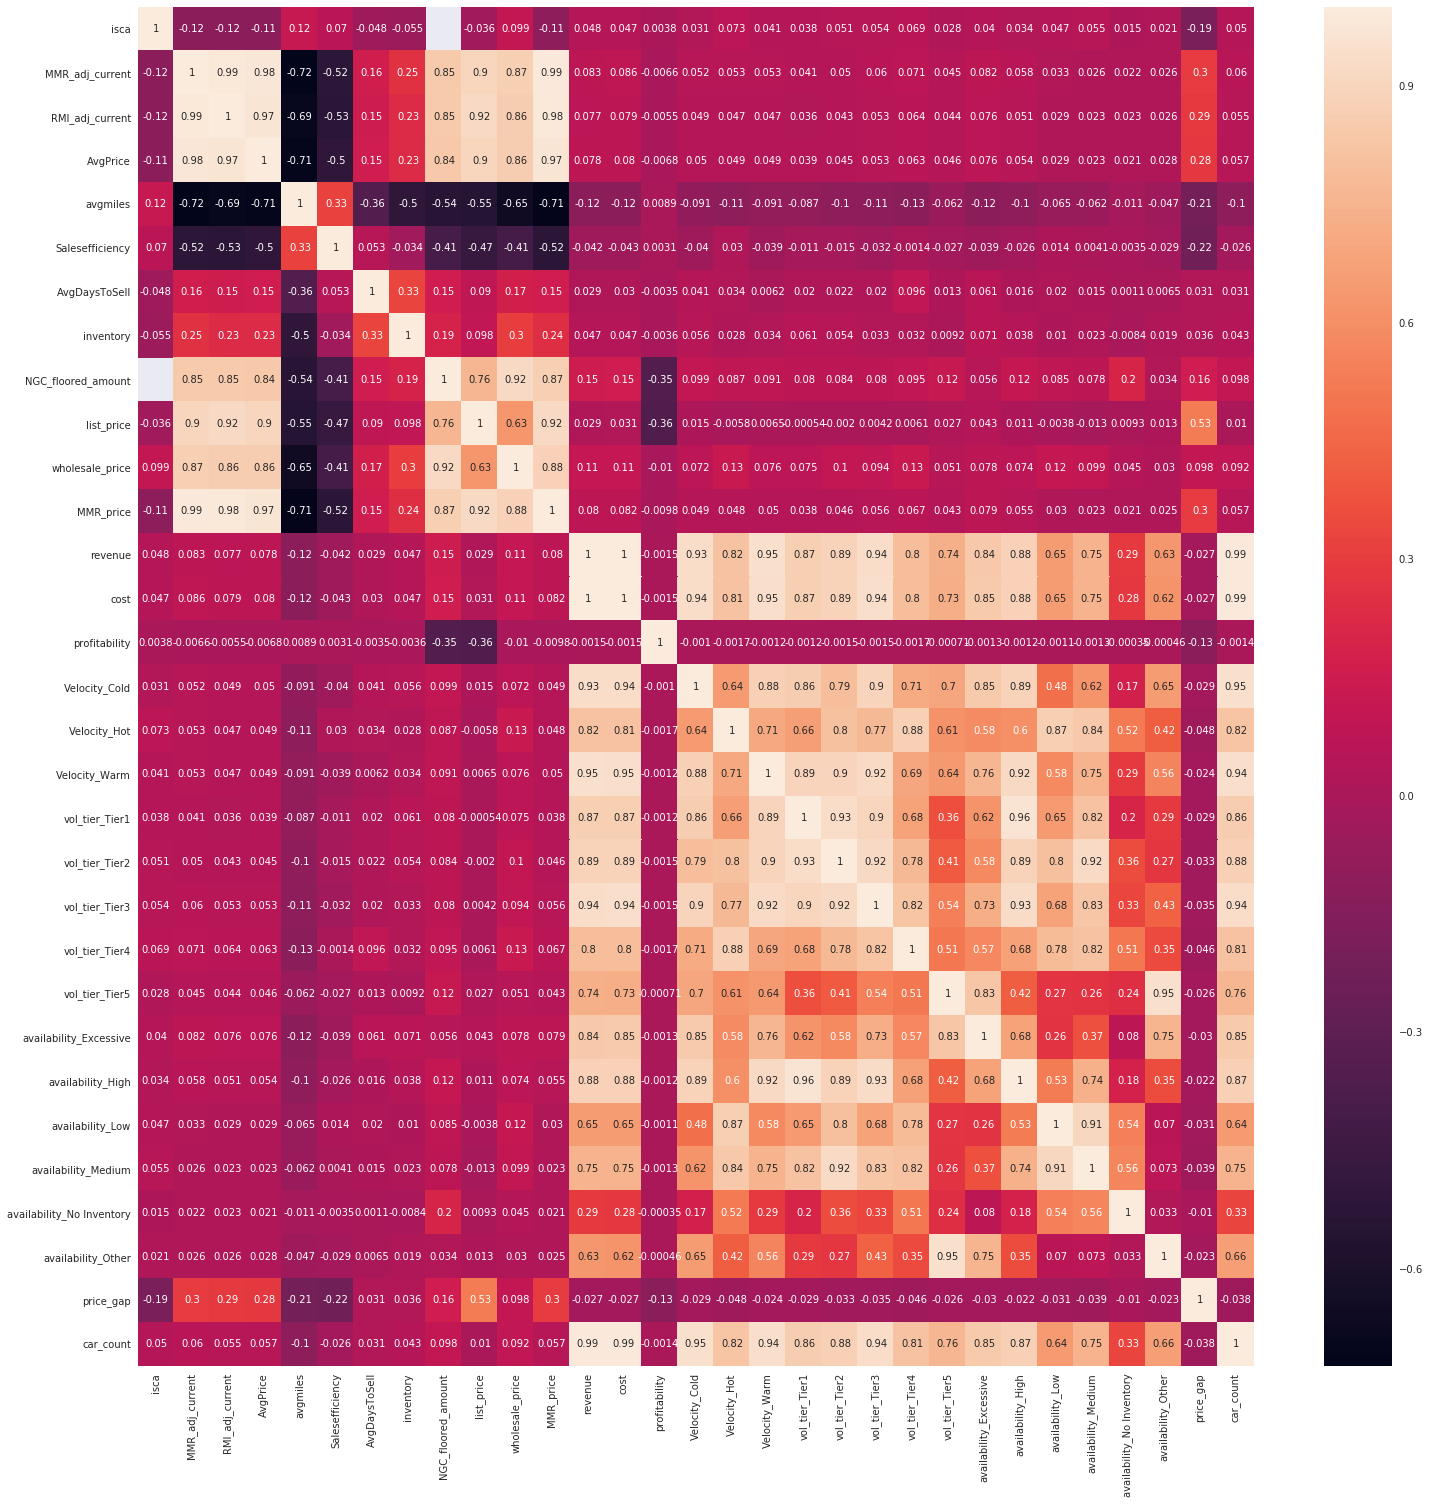

In [7]:
#plot heat map

corrmatrix = Dealer.corr()
top_correlated_features = corrmatrix.index
plt.figure(figsize=(25,25))
plot=sns.heatmap(Dealer[top_correlated_features].corr(),annot=True)

In [9]:
Dealer.columns

Index(['isca', 'caid', 'Vin', 'MMR_adj_current', 'RMI_adj_current', 'AvgPrice',
       'avgmiles', 'Salesefficiency', 'AvgDaysToSell', 'inventory',
       'NGC_floored_amount', 'list_price', 'wholesale_price', 'MMR_price',
       'revenue', 'cost', 'profitability', 'Velocity_Cold', 'Velocity_Hot',
       'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2', 'vol_tier_Tier3',
       'vol_tier_Tier4', 'vol_tier_Tier5', 'availability_Excessive',
       'availability_High', 'availability_Low', 'availability_Medium',
       'availability_No Inventory', 'availability_Other', 'price_gap',
       'car_count'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae6688b588>,
      dtype=object)

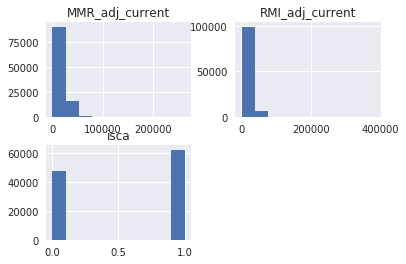

In [32]:
pd.DataFrame.hist(Dealer.iloc[:,0:5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae66b58a58>,
      dtype=object)

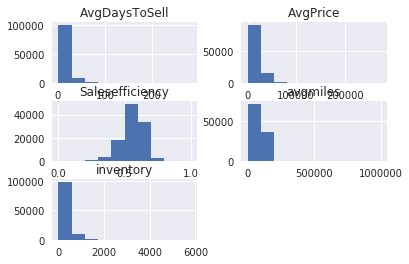

In [30]:
pd.DataFrame.hist(Dealer.iloc[:,5:10])

In [3]:
Car = pd.read_csv('data_324.csv')

In [9]:
pd.set_option('display.max_columns', None)
print(Car.shape)
Car.head()

(22769966, 40)


,isca,caid,Vin,Year,Make,Model,Trim,Mileage,Date,MIDMapAlgorithm,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Velocity,Salesefficiency,AvgDaysToSell,vol_tier,availability,inventory,spread_current,buyer_how_paid_cd,floorplan_cur_cust_nm,floorplan_cust_ovc_id,NGC_purchase_price,NGC_floored_amount,wholesale_price,MMR_price,list_price,price,cost,revenue,profit,profitability,NGC_total_floored,wallet_share,count_vin,count_vin_for_wallet_share,count_vin_floored,count_vin_floored_by_NGC
0,1,CA11197380,1GTR2VE7XCZ218323,2012,GMC,Sierra 1500,Truck,NaN,2019-10-30,Exact,11750.0,16600.0,13051.0,116676.0,Warm,0.494258,15.0,Tier3,Medium,61.0,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,11750.0,NaN,16600.0,37900.0,48050.0,10150.0,0.211238,0.0,0.0,3,3.0,0.0,0.0
1,1,CA11197380,2HGFB6E50DH705377,2013,Honda,Civic,Other,NaN,2019-10-12,Exact,10150.0,13900.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,3750.0,NaN,NaN,NaN,NaN,NaN,NaN,10150.0,NaN,13900.0,37900.0,48050.0,10150.0,0.211238,0.0,0.0,3,3.0,0.0,0.0
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,Sonata,Sedan,19310.0,2019-10-20,Exact,16000.0,17550.0,11112.0,44270.0,Cold,0.693079,21.0,Tier1,Low,502.0,1550.0,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,17550.0,37900.0,48050.0,10150.0,0.211238,0.0,0.0,3,3.0,0.0,0.0
3,1,CA11197386,19XFA1F59AE046628,2010,Honda,Civic,LX,79889.0,2019-08-21,Exact,4225.0,7225.0,3671.0,127175.0,Hot,0.731679,12.0,Tier3,Low,51.0,3000.0,Check,NaN,NaN,NaN,NaN,5700.0,5700.0,NaN,7225.0,5903300.0,6464402.0,561102.0,0.086799,0.0,0.0,242,212.0,0.0,0.0
4,1,CA11197386,19XFB2F55DE031146,2013,Honda,Civic,LX,80827.0,2019-08-21,Exact,7075.0,9950.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,2875.0,Check,NaN,NaN,NaN,NaN,7600.0,7600.0,NaN,9950.0,5903300.0,6464402.0,561102.0,0.086799,0.0,0.0,242,212.0,0.0,0.0


In [10]:
Car.describe()

,isca,Year,Mileage,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,spread_current,floorplan_cust_ovc_id,NGC_purchase_price,NGC_floored_amount,wholesale_price,MMR_price,list_price,price,cost,revenue,profit,profitability,NGC_total_floored,wallet_share,count_vin,count_vin_for_wallet_share,count_vin_floored,count_vin_floored_by_NGC
count,2.276997e+07,2.276997e+07,1.852763e+07,1.960329e+07,1.990096e+07,2.185262e+07,2.185262e+07,2.185202e+07,2.185262e+07,2.180093e+07,1.861176e+07,4.383650e+05,2.338500e+05,129208.000000,1.230838e+06,1.926375e+07,1.543970e+07,1.925260e+07,2.276997e+07,2.276997e+07,2.276997e+07,2.276063e+07,2.276997e+07,2.276123e+07,2.276997e+07,2.276997e+07,2.276997e+07,2.276997e+07
mean,7.127387e-01,2.016537e+03,3.656909e+04,1.996770e+04,2.432542e+04,2.126930e+04,4.279776e+04,5.489820e-01,2.166209e+01,3.358166e+02,3.205779e+03,6.055633e+06,1.519570e+04,12982.894838,1.394862e+04,2.012705e+04,2.596856e+04,2.345336e+04,1.199476e+08,1.402220e+08,2.027562e+07,1.509097e-01,5.585544e+04,6.359213e-03,7.280631e+03,5.856194e+03,2.052038e+01,5.143100e+00
std,4.524845e-01,4.107677e+00,9.173343e+04,1.273021e+04,1.360660e+04,1.355159e+04,4.505016e+04,1.470718e-01,1.680409e+01,5.427201e+02,1.636482e+03,3.038274e+04,1.446985e+04,11389.042407,1.167996e+04,1.263572e+04,1.776314e+04,1.350847e+04,4.842781e+08,5.652678e+08,8.146247e+07,6.694744e-02,1.616375e+06,6.194753e-02,2.976584e+04,2.236779e+04,2.636436e+02,1.139655e+02
min,0.000000e+00,1.916000e+03,0.000000e+00,1.000000e+02,1.000000e+02,2.390000e+02,1.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,6.048239e+06,1.000000e+00,195.000000,1.000000e+00,1.000000e+00,0.000000e+00,-1.195000e+03,0.000000e+00,0.000000e+00,-4.717133e+06,-5.310822e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.016000e+03,1.200000e+01,1.155000e+04,1.530000e+04,1.251300e+04,1.219500e+04,4.611541e-01,1.500000e+01,4.900000e+01,2.200000e+03,6.048252e+06,6.955000e+03,5595.000000,5.000000e+03,1.180000e+04,1.499500e+04,1.470000e+04,7.320865e+06,8.578023e+06,1.195288e+06,1.220519e-01,0.000000e+00,0.000000e+00,4.440000e+02,3.610000e+02,0.000000e+00,0.000000e+00
50%,1.000000e+00,2.018000e+03,1.814700e+04,1.815000e+04,2.210000e+04,1.914000e+04,2.247400e+04,5.556433e-01,1.800000e+01,1.340000e+02,2.925000e+03,6.048260e+06,1.217500e+04,10385.000000,1.210000e+04,1.825000e+04,2.360000e+04,2.140000e+04,1.680691e+07,1.957314e+07,2.663063e+06,1.416911e-01,0.000000e+00,0.000000e+00,9.950000e+02,8.210000e+02,0.000000e+00,0.000000e+00
75%,1.000000e+00,2.019000e+03,5.196200e+04,2.660000e+04,3.110000e+04,2.853400e+04,5.629300e+04,6.533333e-01,2.200000e+01,4.160000e+02,3.800000e+03,6.048260e+06,1.953000e+04,17125.000000,1.980000e+04,2.670000e+04,3.420000e+04,2.996000e+04,3.653278e+07,4.203152e+07,5.707973e+06,1.597035e-01,0.000000e+00,0.000000e+00,2.104000e+03,1.774000e+03,0.000000e+00,0.000000e+00
max,1.000000e+00,2.020000e+03,2.987923e+08,2.643000e+05,3.821000e+05,3.373570e+05,9.956260e+05,1.000000e+00,2.830000e+02,5.798000e+03,4.640000e+04,6.183234e+06,1.100000e+06,342150.000000,4.160000e+05,4.160000e+05,8.644300e+06,9.850000e+05,3.717089e+09,4.345525e+09,6.284362e+08,9.999436e-01,7.988542e+07,1.000000e+00,2.337140e+05,1.838800e+05,8.556000e+03,4.306000e+03


In [11]:
len(Car.caid.unique())

109873

In [12]:
Car.caid.unique()

array(['CA11197380', 'CA11197386', 'CA11197387', ...,
       'wholesaleSAPT7000455', 'wholesaleSAPT7000456',
       'wholesaleSWFL7611426'], dtype=object)

In [17]:
Car.isna().sum()

isca                                 0
caid                                 0
Vin                                  0
Year                                 0
Make                              9423
Model                            15418
Trim                            879987
Mileage                        4242336
Date                                 0
MIDMapAlgorithm                      0
MMR_adj_current                3166679
RMI_adj_current                2869002
AvgPrice                        917343
avgmiles                        917343
Velocity                       1366083
Salesefficiency                 917944
AvgDaysToSell                   917343
vol_tier                        917343
availability                    917349
inventory                       969034
spread_current                 4158207
buyer_how_paid_cd             21665872
floorplan_cur_cust_nm         22331601
floorplan_cust_ovc_id         22331601
NGC_purchase_price            22536116
NGC_floored_amount       

In [ ]:
sns.pairplot(Car, size=2.5)
plt.tight_layout()
plt.show()

MemoryError: 

In [ ]:
corrmatrix = Car.corr()
top_correlated_features = corrmatrix.index
plt.figure(figsize=(25,25))
plot=sns.heatmap(Car[top_correlated_features].corr(),annot=True)

In [ ]:
Car.columns

In [28]:
examine.tail()

,EFFECTIVE_END_TS,EFFECTIVE_START_TS,LATEST_VERSION_IND,Source,body_bed_style,body_cab_style,body_description,body_door_count,body_roof_style,body_type,...,Velocity,Salesefficiency,AvgDaysToSell,vol_tier,availability,inventory,spread_current,vauto_seller_name,atc_customer_id,caid
8876042,1815-03-31 05:56:08.066277376,2019-08-02 00:00:00.000000000,1,VASNC,NaN,Cargo Van,4D Cargo Van,4.0,NaN,Minivan/Van,...,NaN,NaN,NaN,NaN,NaN,NaN,3450.0,RIVERSIDE AUTOPLEX OF MUSKOGEE,65267601.0,CA11233414
8876043,1815-03-31 05:56:08.066277376,2019-09-09 00:00:00.000000000,1,VASNC,NaN,Cargo Van,4D Cargo Van,4.0,NaN,Minivan/Van,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HERB CHAMBERS CHRYSLER JEEP DODGE OF DANVERS,1154075.0,CA11205324
8876044,1815-03-31 05:56:08.066277376,2019-10-01 00:00:00.000000000,1,VASNC,NaN,NaN,4D Sport Utility,4.0,NaN,SUV,...,Warm,0.269231,43.0,Tier5,Excessive,9.0,NaN,BENTLEY ROLLS-ROYCE MASERATI OF PASADENA,100003546.0,CA11198854
8876045,1815-03-31 05:56:08.066277376,2019-09-19 00:00:00.000000000,1,VASNC,NaN,NaN,4D Sport Utility,4.0,NaN,SUV,...,Warm,0.269231,43.0,Tier5,Excessive,9.0,NaN,NaN,NaN,POTSill-TerHar Motors
8876046,1815-03-31 05:56:08.066277376,2019-08-07 00:00:00.000000000,1,VASNC,NaN,NaN,4D Sport Utility,4.0,NaN,SUV,...,Hot,0.333333,4.0,Tier5,Low,1.0,6400.0,Lamborghini Paramus,100018096.0,CA11200809
